In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import shutil
import os

In [4]:
from fastai import *
from fastai.vision import *

In [5]:
path = Path('.')

In [6]:
path_img = path/'dataset'
path_img.ls()

[WindowsPath('dataset/covid'), WindowsPath('dataset/normal')]

In [7]:
df = pd.read_csv('metadata.csv')
df.head()

Patientid  offset sex   age   finding survival view modality  date  \
0          2     0.0   M  65.0  COVID-19        Y   PA    X-ray  2020   
1          2     3.0   M  65.0  COVID-19        Y   PA    X-ray  2020   
2          2     5.0   M  65.0  COVID-19        Y   PA    X-ray  2020   
3          2     6.0   M  65.0  COVID-19        Y   PA    X-ray  2020   
4          4     0.0   F  52.0  COVID-19      NaN   PA    X-ray  2020   

                                            location  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Changhua Christian Hospital, Changhua City, Ta...   

                                            filename                   doi  \
0  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
1  auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
2  auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
3  auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
4                              nejmc2001573_f1a.jpeg  10.1056/NEJMc2001573   

                                                 url license  \
0  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   
1  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   
2  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   
3  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   
4  https://www.nejm.org/doi/full/10.1056/NEJMc200...     NaN   

                                     clinical notes other notes Unnamed: 16  
0                                               NaN         NaN         NaN  
1                                               NaN         NaN         NaN  
2                                               NaN         NaN         NaN  
3                                               NaN         NaN         NaN  
4  diffuse infiltrates in the bilateral lower lungs         NaN         NaN

In [8]:
df=df.filter(['filename','finding'])

In [9]:
data = ImageDataBunch.from_df(path/'images',df , valid_pct=0.2,ds_tfms=get_transforms(), size=512,bs=8,num_workers=0).normalize(imagenet_stats)

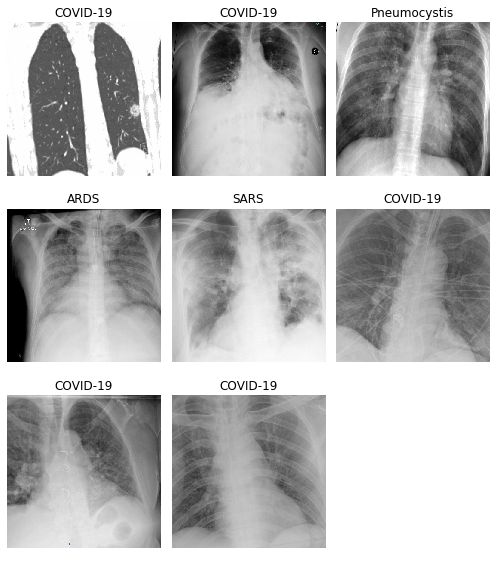

In [11]:
data.show_batch(rows=3,figsize=(7,8))

In [12]:
data.classes

['ARDS', 'COVID-19', 'No Finding', 'Pneumocystis', 'SARS', 'Streptococcus']

In [14]:
learn=cnn_learner(data,models.resnet50,metrics=error_rate)

In [12]:
learn.fit_one_cycle(5)

In [14]:
learn.save('stage-1-124-resnet50')

In [15]:
learn.load('stage-1-124-resnet50')

Learner(data=ImageDataBunch;

Train: LabelList (116 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
COVID-19,COVID-19,COVID-19,COVID-19,ARDS
Path: images;

Valid: LabelList (29 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
COVID-19,COVID-19,COVID-19,COVID-19,COVID-19
Path: images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


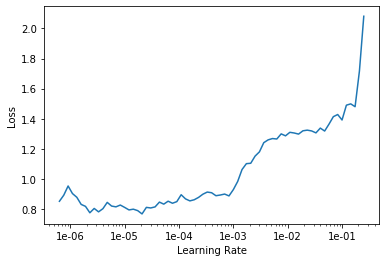

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(5,slice(1e-04,0.003/5))

In [53]:
learn.save('stage-2-resnet50')

In [15]:
learn.load('stage-2-resnet50')

Learner(data=ImageDataBunch;

Train: LabelList (116 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
COVID-19,COVID-19,COVID-19,COVID-19,COVID-19
Path: images;

Valid: LabelList (29 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
COVID-19,COVID-19,COVID-19,COVID-19,COVID-19
Path: images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


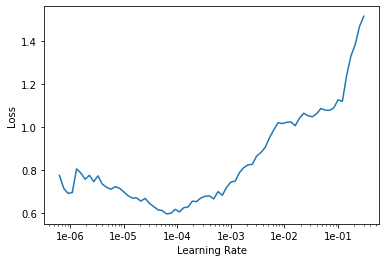

In [21]:
learn.recorder.plot()

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

In [58]:
learn.export()

In [59]:
defaults.device = torch.device('cpu')

In [51]:
data = ImageDataBunch.from_df(path/'images',df , 
                              valid_pct=0.2,
                              ds_tfms=get_transforms(),
                              size=1024,bs=16,
                              num_workers=0).normalize(imagenet_stats)

In [54]:
learn.unfreeze()

In [55]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


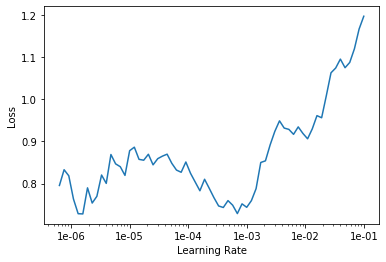

In [56]:
learn.recorder.plot()

In [57]:
learn.fit_one_cycle(5,slice(1e-04,1e-3/5))

In [64]:
learn.save('finetuned-resnet50')

In [16]:
learn.load('finetuned-resnet50')

Learner(data=ImageDataBunch;

Train: LabelList (116 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
COVID-19,COVID-19,COVID-19,COVID-19,COVID-19
Path: images;

Valid: LabelList (29 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
COVID-19,COVID-19,COVID-19,COVID-19,COVID-19
Path: images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

In [23]:
data.valid_ds.items

array(['images\\lancet-case2b.jpg', 'images\\F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg',
       'images\\5e6dd879fde9502400e58b2f.jpeg', 'images\\1-s2.0-S0929664620300449-gr3_lrg-a.jpg',
       'images\\jkms-35-e79-g001-l-c.jpg', 'images\\1-s2.0-S0929664620300449-gr2_lrg-c.jpg',
       'images\\7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg',
       'images\\auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
       'images\\D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg', 'images\\191F3B3A-2879-4EF3-BE56-EE0D2B5AAEE3.jpeg',
       'images\\covid-19-pneumonia-15-L.jpg', 'images\\396A81A5-982C-44E9-A57E-9B1DC34E2C08.jpeg',
       'images\\39EE8E69-5801-48DE-B6E3-BE7D1BCF3092.jpeg', 'images\\41591_2020_819_Fig1_HTML.webp-day10.png',
       'images\\31BA3780-2323-493F-8AED-62081B9C383B.jpeg', 'images\\7D2CF6CE-F529-4470-8356-D33FFAF98600.jpeg',
       'images\\covid-19-pneumonia-7-L.jpg',
       'images\\streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day1.jpg', 'images

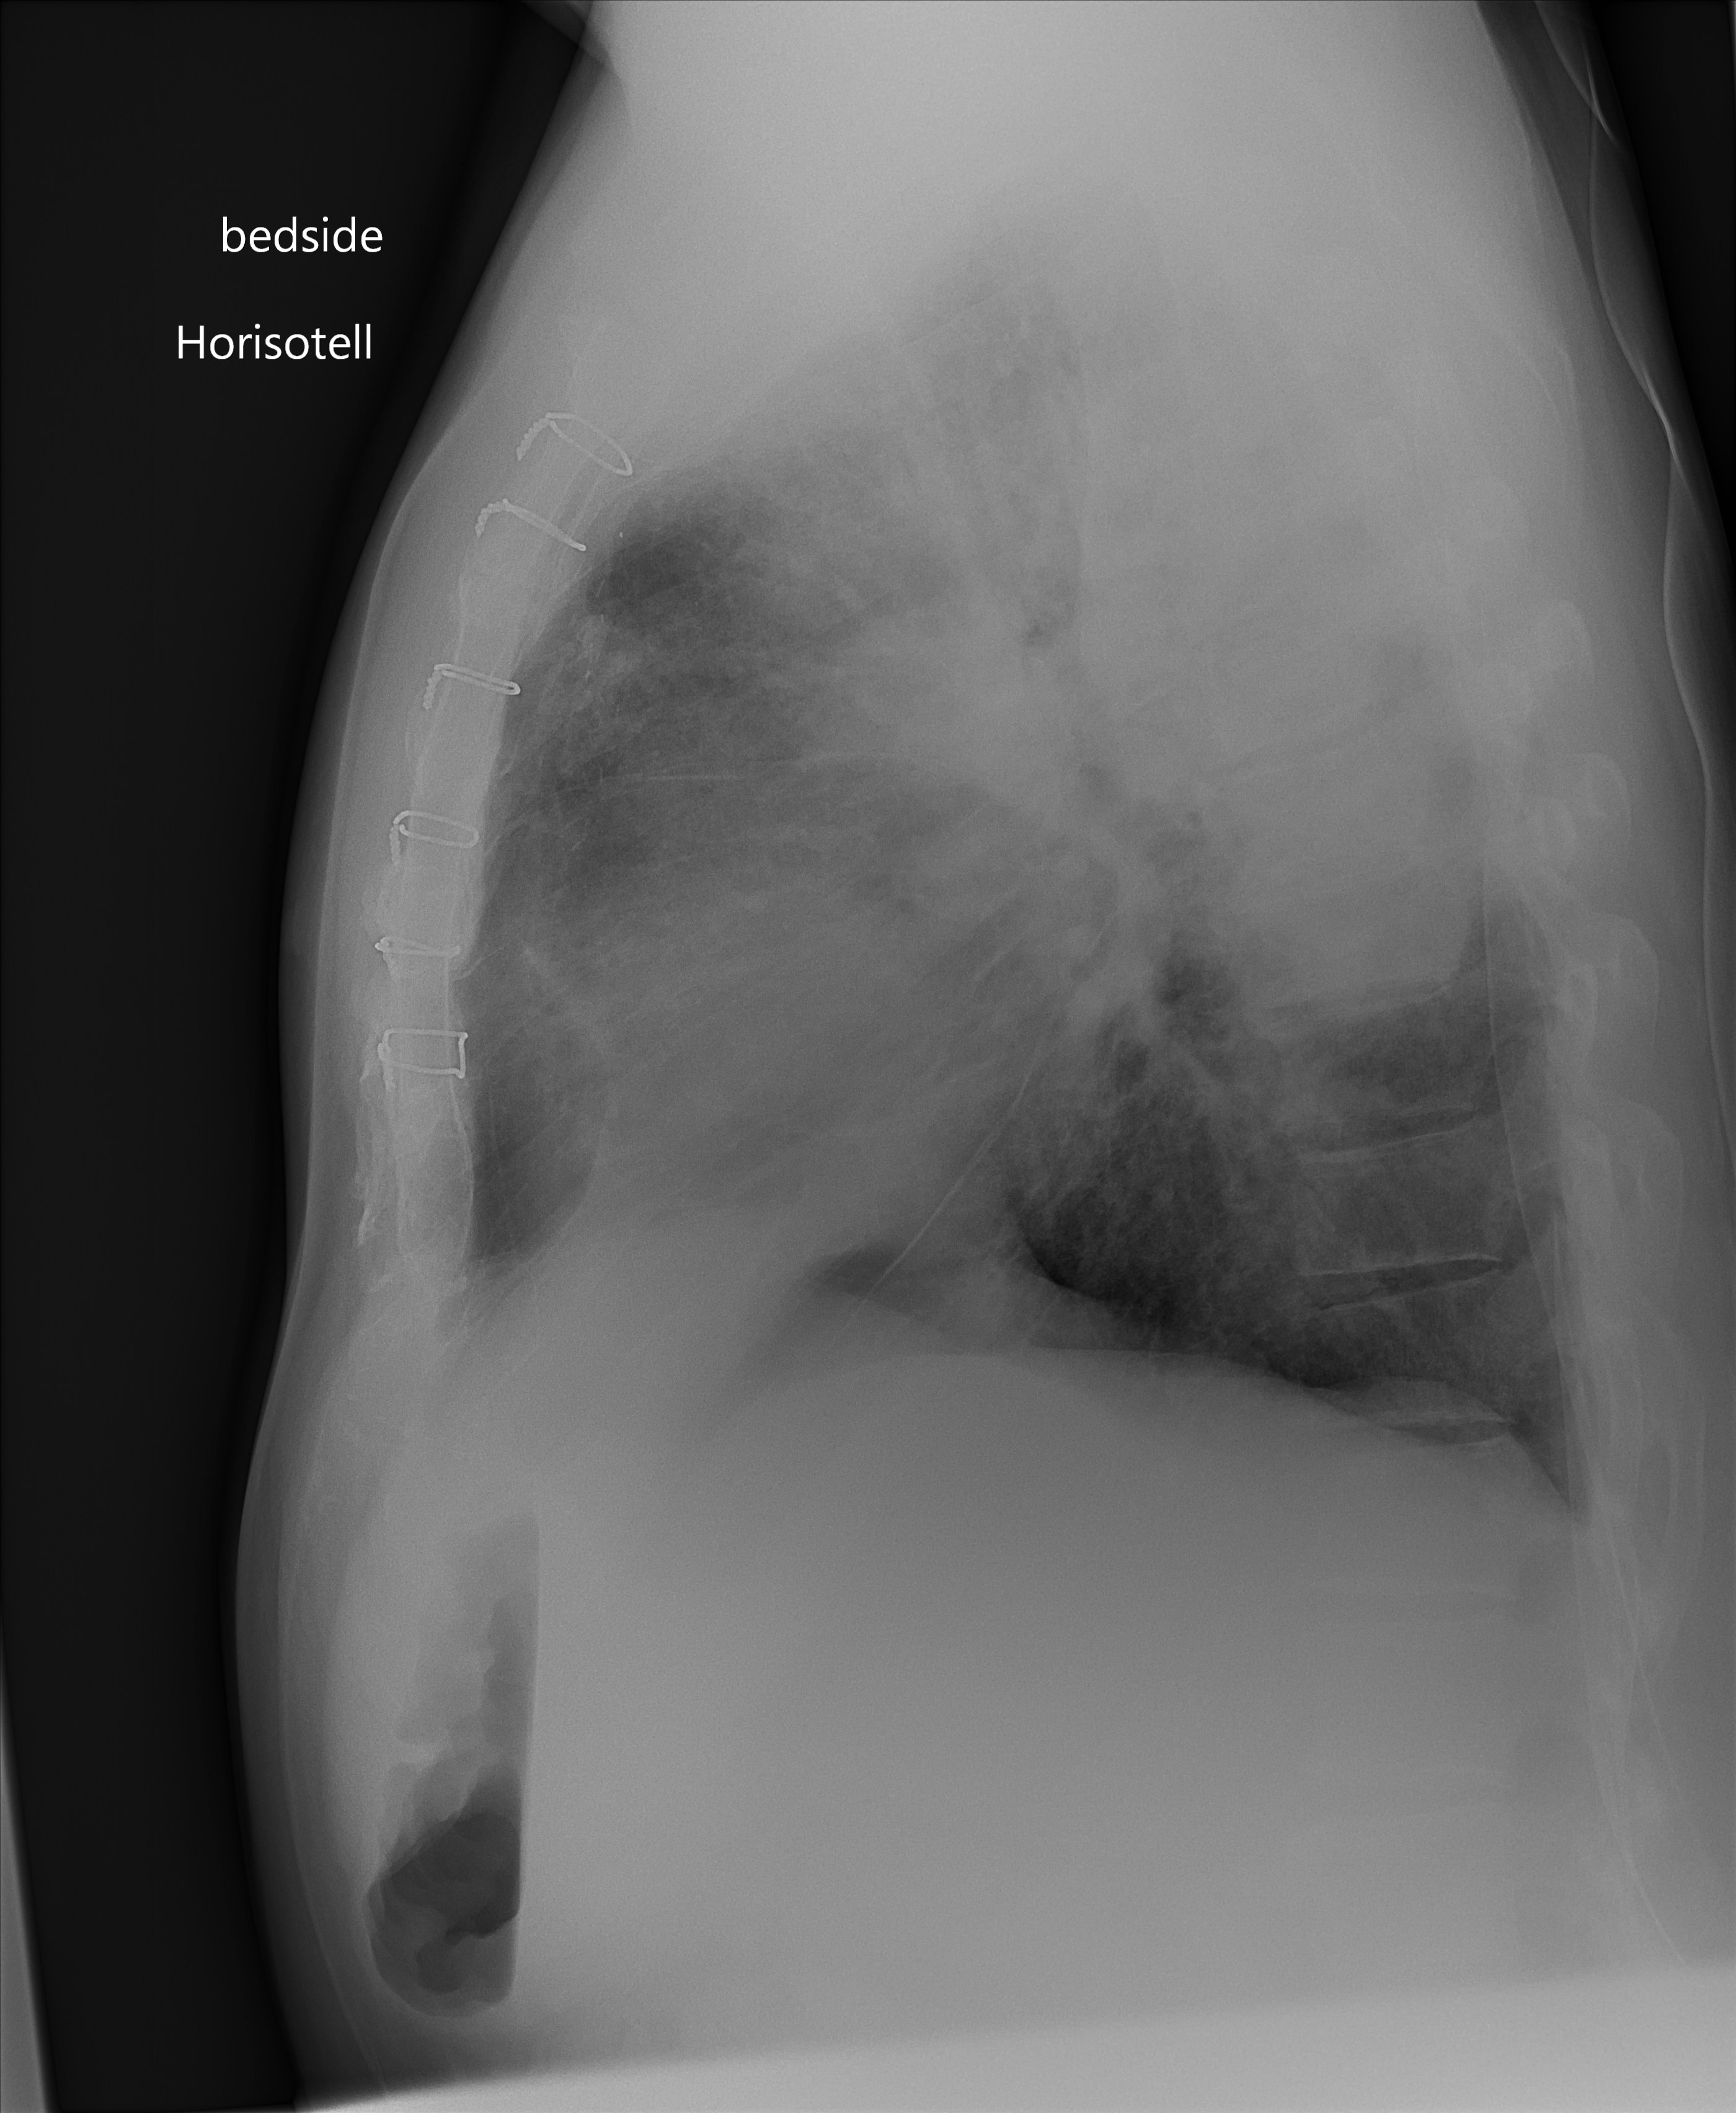

In [24]:
img = open_image(path/'images\\covid-19-pneumonia-15-L.jpg', 'images\\396A81A5-982C-44E9-A57E-9B1DC34E2C08.jpeg')
img

In [25]:
pred_class,pred_idx,output = learn.predict(img)
pred_class

Category COVID-19

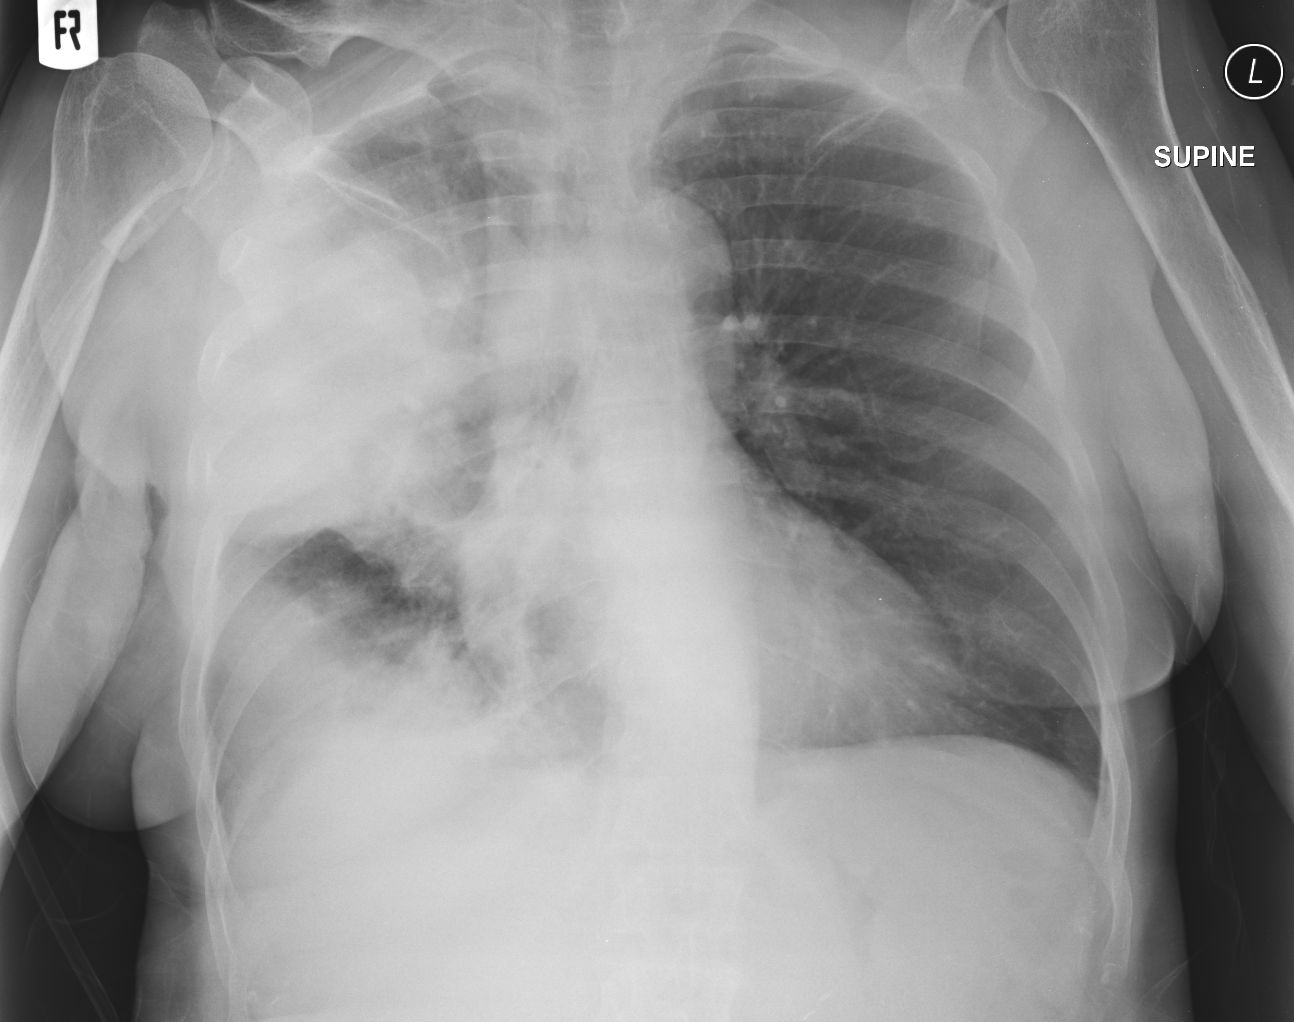

In [26]:
img = open_image(path/'images\\streptococcus-pneumoniae-pneumonia-1.jpg')
img

In [27]:
pred_class,pred_idx,output = learn.predict(img)
pred_class

Category Streptococcus